In ML there are some algirithmns which work well under Normal Distribution ,


So to convert the data present within the column , We use Function transformer.

How one can know whether data is normally distributed or not so to get know about this thing we use 

distplot and QQplot

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression

In [2]:
titanic=pd.read_csv('train (2).csv',usecols=['Age','Survived','Fare'])

In [3]:
titanic.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
titanic.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)

In [6]:
titanic.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

C:\Users\abhis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


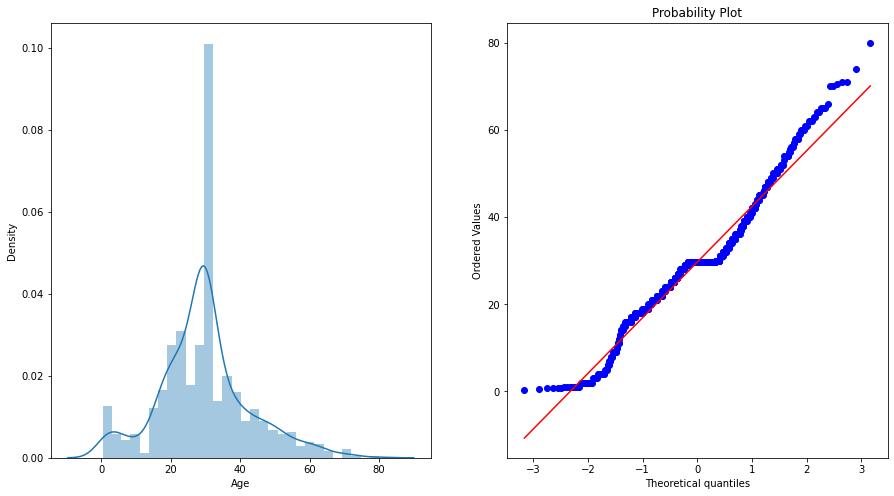

In [7]:
plt.figure(figsize=(15,8))
plt.subplot(121)
sns.distplot(titanic['Age'])

plt.subplot(122)
stats.probplot(titanic['Age'],dist="norm",plot=plt)

plt.show()

C:\Users\abhis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


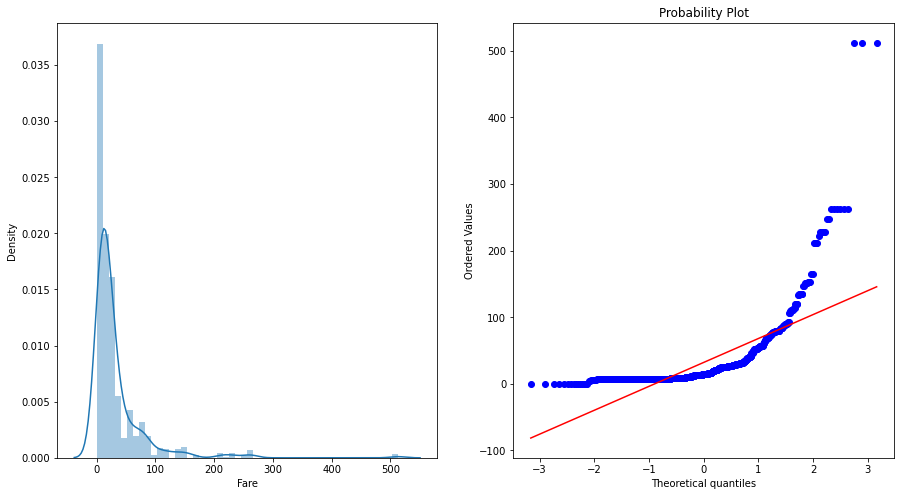

In [8]:
# Graph For Fare

plt.figure(figsize=(15,8))
plt.subplot(121)
sns.distplot(titanic['Fare'])

plt.subplot(122)
stats.probplot(titanic['Fare'],dist="norm",plot=plt)

plt.show()

In [9]:
X=titanic.drop('Survived',axis=1)
y=titanic['Survived']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
LO=LogisticRegression()

LO.fit(X_train,y_train)


LogisticRegression()

In [12]:
y_train_predict=LO.predict(X_train)
train_acc=accuracy_score(y_train,y_train_predict)

In [13]:
train_acc

0.6560402684563759

We have got above score without Applying Transformer

In [14]:



# Applying Tramsformer

trf1=FunctionTransformer(func=np.log1p)

In [15]:
X_train_new=trf1.fit_transform(X_train)

LO.fit(X_train_new,y_train)

LogisticRegression()

In [16]:
y_train_predict_transfor=LO.predict(X_train_new)

In [17]:
train_acc_transform=accuracy_score(y_train,y_train_predict_transfor)

In [18]:
train_acc_transform

0.6828859060402684

As we can see that our accuracy score increases

C:\Users\abhis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


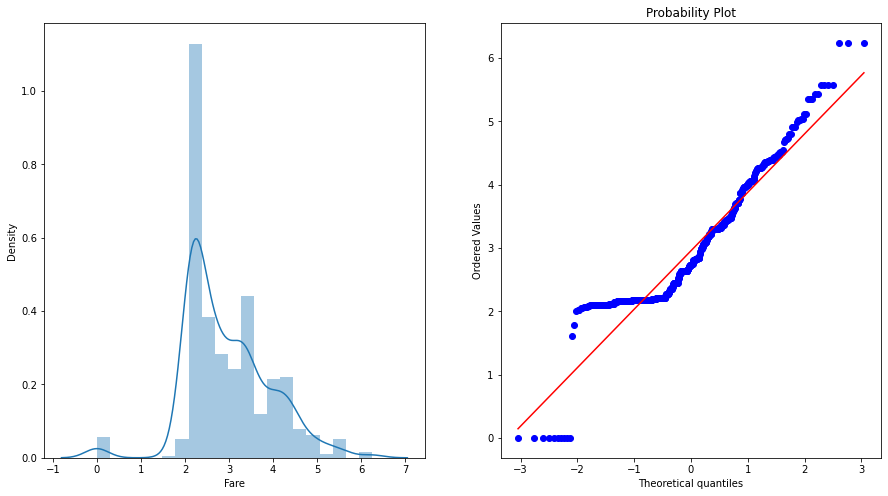

In [19]:
# Graph for Fare After Distribution


plt.figure(figsize=(15,8))
plt.subplot(121)
sns.distplot(X_train_new['Fare'])

plt.subplot(122)
stats.probplot(X_train_new['Fare'],dist="norm",plot=plt)

plt.show()